# import modules and set plot environment

In [1]:
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

Using TensorFlow backend.


check keras version

In [2]:
keras.__version__


'2.1.3'

# data loading

In [13]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [16]:
Y_test.shape

(10000,)

In [64]:
Y_train[2,:].argmax()

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [70]:
def plotMNIST(X,Y,  maxN=30, print_digits=True):
    # plot pixels
    plt.gray()
    fig = plt.figure( figsize=(16,7) )
    for i in range(0,maxN):
        if print_digits:
            ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(Y[i,:].argmax()) )
        else:
            ax = fig.add_subplot(3,10,i+1)
        
        ax.matshow(X[i,:].reshape((28,28)).astype(float))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    plt.show()

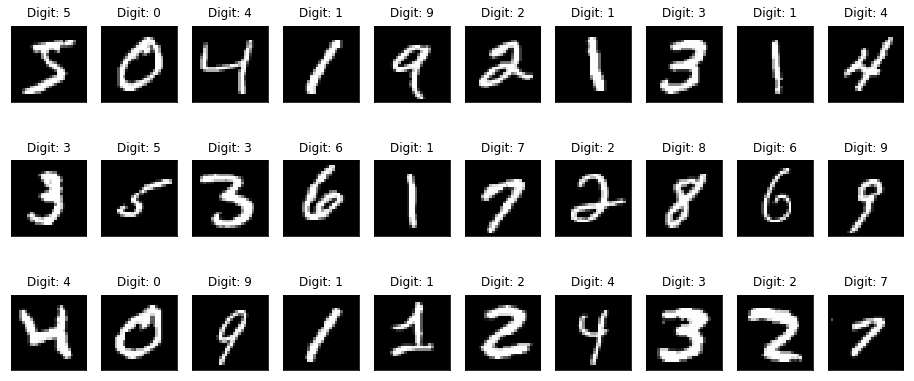

In [71]:
plotMNIST(X_train, Y_train, 30)

# data preprocessing

In [17]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

# plain logistic regression, to keep it simple and fast

In [24]:
logreg = Sequential()

logreg.add(Flatten(input_shape=(28, 28, 1)))
logreg.add(Dense(10))
logreg.add(Activation('softmax'))

logreg.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the model

In [19]:
logreg.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2842 - acc: 0.9231 - val_loss: 0.2898 - val_acc: 0.9228
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2811 - acc: 0.9249 - val_loss: 0.2864 - val_acc: 0.9247
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2796 - acc: 0.9263 - val_loss: 0.2907 - val_acc: 0.9253
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.2791 - acc: 0.9269 - val_loss: 0.2872 - val_acc: 0.9257
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.2782 - acc: 0.9276 - val_loss: 0.2893 - val_acc: 0.9278
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2785 - acc: 0.9291 - val_loss: 0.2947 - val_acc: 0.9235
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.2778 - acc: 0.9296 - val_loss: 0.2959 - val_acc

# make updatable plot to show training progress

In [52]:
class PlotLossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        #self.fig = plt.subplots(figsize=(16, 8), ncols=2)
        #self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        plt.subplots(figsize=(16, 8), ncols=2)
        clear_output(wait=True)
        plt.subplot(221)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.subplot(222)
        plt.plot(self.x, self.acc, label="accuracy")
        plt.plot(self.x, self.val_acc, label="val_accuracy")
        plt.legend()
        plt.show();
        
ShowLoss = PlotLossHistory()

In [ ]:
logreg.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[ShowLoss],
          verbose=1)

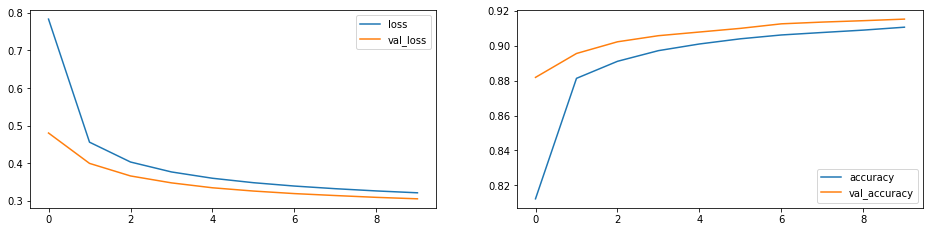

60000/60000 [==============================] - 4s 68us/step - loss: 0.3214 - acc: 0.9107 - val_loss: 0.3054 - val_acc: 0.9153


In [55]:
logreg = Sequential()

logreg.add(Flatten(input_shape=(28, 28, 1)))
logreg.add(Dense(10))
logreg.add(Activation('softmax'))
logreg.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
logreg.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[ShowLoss],
          verbose=1)

# make predictions

In [82]:
label = logreg.predict(X_test[0:50,:])

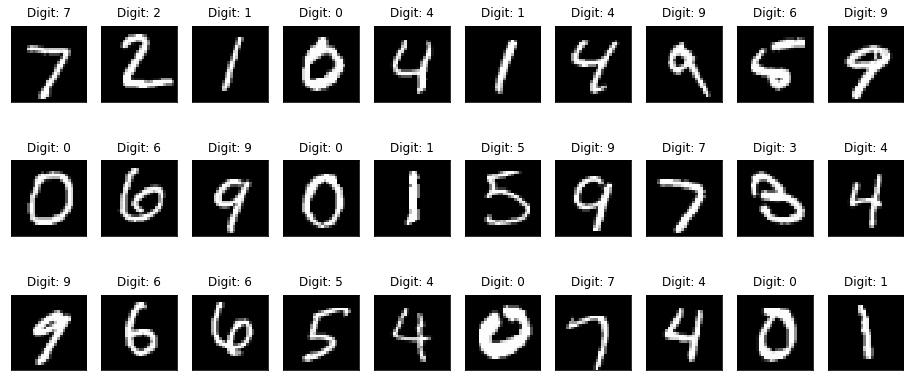

In [84]:
plotMNIST(X_test, label, 30)

# simple two layer neural network

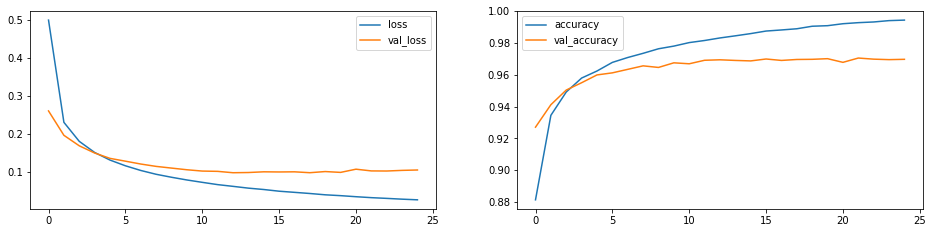

60000/60000 [==============================] - 6s 108us/step - loss: 0.0260 - acc: 0.9943 - val_loss: 0.1046 - val_acc: 0.9697


In [100]:
NNet = Sequential()

NNet.add(Flatten(input_shape=(28, 28, 1)))
NNet.add(Dense(50,  activation='sigmoid'))
NNet.add(Dense(10))
NNet.add(Activation('softmax'))
NNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
NNet.fit(X_train, Y_train,
          epochs=25,
          validation_data=(X_test, Y_test),
          callbacks=[ShowLoss],
          verbose=1)

# changing the activation functions

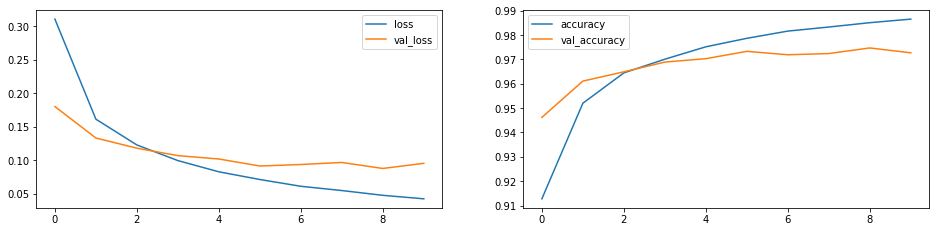

60000/60000 [==============================] - 6s 97us/step - loss: 0.0426 - acc: 0.9865 - val_loss: 0.0956 - val_acc: 0.9727


In [99]:
NNet = Sequential()

NNet.add(Flatten(input_shape=(28, 28, 1)))
NNet.add(Dense(50,  activation='relu'))
NNet.add(Dense(10))
NNet.add(Activation('softmax'))
NNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
NNet.fit(X_train, Y_train,
          epochs=25,
          validation_data=(X_test, Y_test),
          callbacks=[ShowLoss],
          verbose=1)

# model regulariation with dropout

In [90]:
from keras.layers import Flatten, Dense, Activation, Dropout

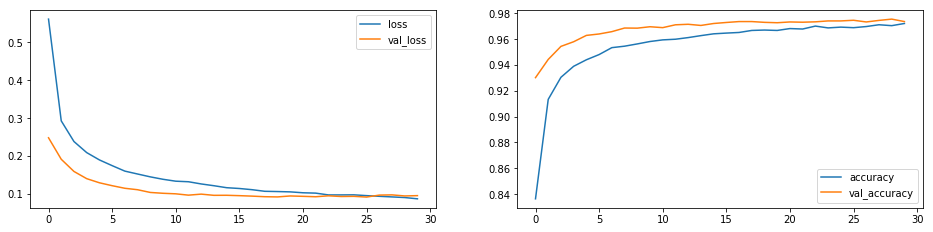

60000/60000 [==============================] - 3s 46us/step - loss: 0.0863 - acc: 0.9720 - val_loss: 0.0947 - val_acc: 0.9735


In [95]:
NNet = Sequential()

NNet.add(Flatten(input_shape=(28, 28, 1)))
NNet.add(Dense(50,  activation='relu'))
NNet.add(Dropout(0.25))
NNet.add(Dense(10))
NNet.add(Activation('softmax'))
NNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
NNet.fit(X_train, Y_train,
          epochs=25,
          validation_data=(X_test, Y_test),
          callbacks=[ShowLoss],
          verbose=1)

# model regulariation by stochastic gradient descent

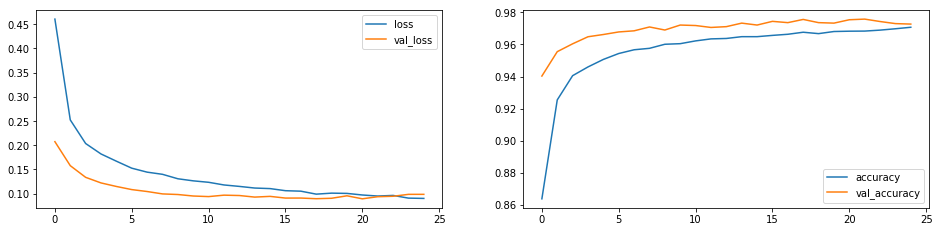

60000/60000 [==============================] - 4s 68us/step - loss: 0.0902 - acc: 0.9707 - val_loss: 0.0986 - val_acc: 0.9727


In [101]:
NNet = Sequential()

NNet.add(Flatten(input_shape=(28, 28, 1)))
NNet.add(Dense(50,  activation='relu'))
NNet.add(Dropout(0.25))
NNet.add(Dense(10))
NNet.add(Activation('softmax'))
NNet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
NNet.fit(X_train, Y_train,
          epochs=25,
          validation_data=(X_test, Y_test),
          callbacks=[ShowLoss],
          verbose=1, batch_size=64)